In [1]:
import pandas as pd
df=pd.read_csv("ryanair_customer_satisfaction.csv")

# Preprocessing new dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows to understand the structure of the dataset
print(df.head())

# List of columns to be removed
columns_to_remove = ["Trip_verified", "Overall Rating", "Comment", "Comment title", "Aircraft", "Seat Comfort", "Food & Beverages", "Ground Service", "Value For Money"]

# Remove the specified columns
df.drop(columns=columns_to_remove, inplace=True)



   Unnamed: 0 Date Published  Overall Rating Passenger Country  Trip_verified  \
0           0     2024-02-03            10.0    United Kingdom   Not Verified   
1           1     2024-01-26            10.0    United Kingdom  Trip Verified   
2           2     2024-01-20            10.0    United Kingdom  Trip Verified   
3           3     2024-01-07             6.0    United Kingdom  Trip Verified   
4           4     2024-01-06            10.0            Israel  Trip Verified   

                              Comment title  \
0         "bang on time and smooth flights"   
1          "Another good affordable flight"   
2                       “Really impressed!”   
3          “a decent offering from Ryanair”   
4  “cabin crew were welcoming and friendly”   

                                             Comment        Aircraft  \
0  Flew back from Faro to London Luton Friday 2nd...  Boeing 737 900   
1  Another good affordable flight with Ryanair. O...             NaN   
2  Really impr

In [3]:
# Check for remaining columns with missing values
# `df.isnull().any()` identifies columns with any missing values
columns_with_nan = df.columns[df.isnull().any()]

print("Columns with missing values:", columns_with_nan)

# Print the number of missing values for each column with missing values
for col in columns_with_nan:
    print(f"{col}: {df[col].isnull().sum()} missing values")


Columns with missing values: Index(['Type Of Traveller', 'Origin', 'Destination', 'Date Flown',
       'Cabin Staff Service', 'Inflight Entertainment', 'Wifi & Connectivity'],
      dtype='object')
Type Of Traveller: 614 missing values
Origin: 615 missing values
Destination: 615 missing values
Date Flown: 618 missing values
Cabin Staff Service: 121 missing values
Inflight Entertainment: 1918 missing values
Wifi & Connectivity: 1981 missing values


count    2249.000000
mean        0.011033
std         0.113394
min        -1.795455
25%         0.000000
50%         0.000000
75%         0.002803
max         1.402181
Name: Quality/price experience, dtype: float64


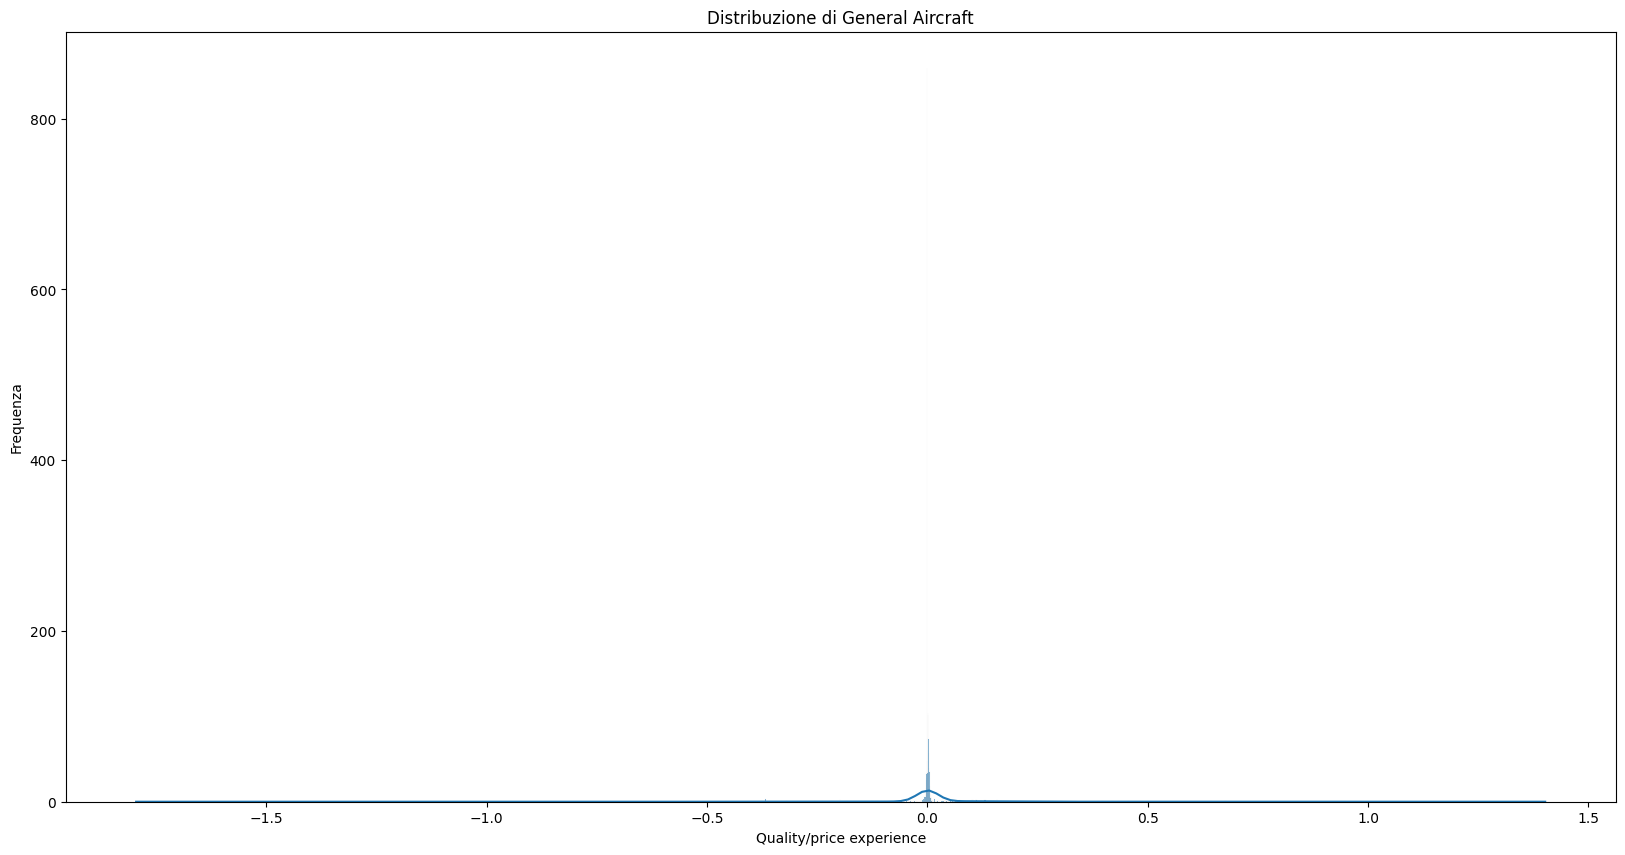

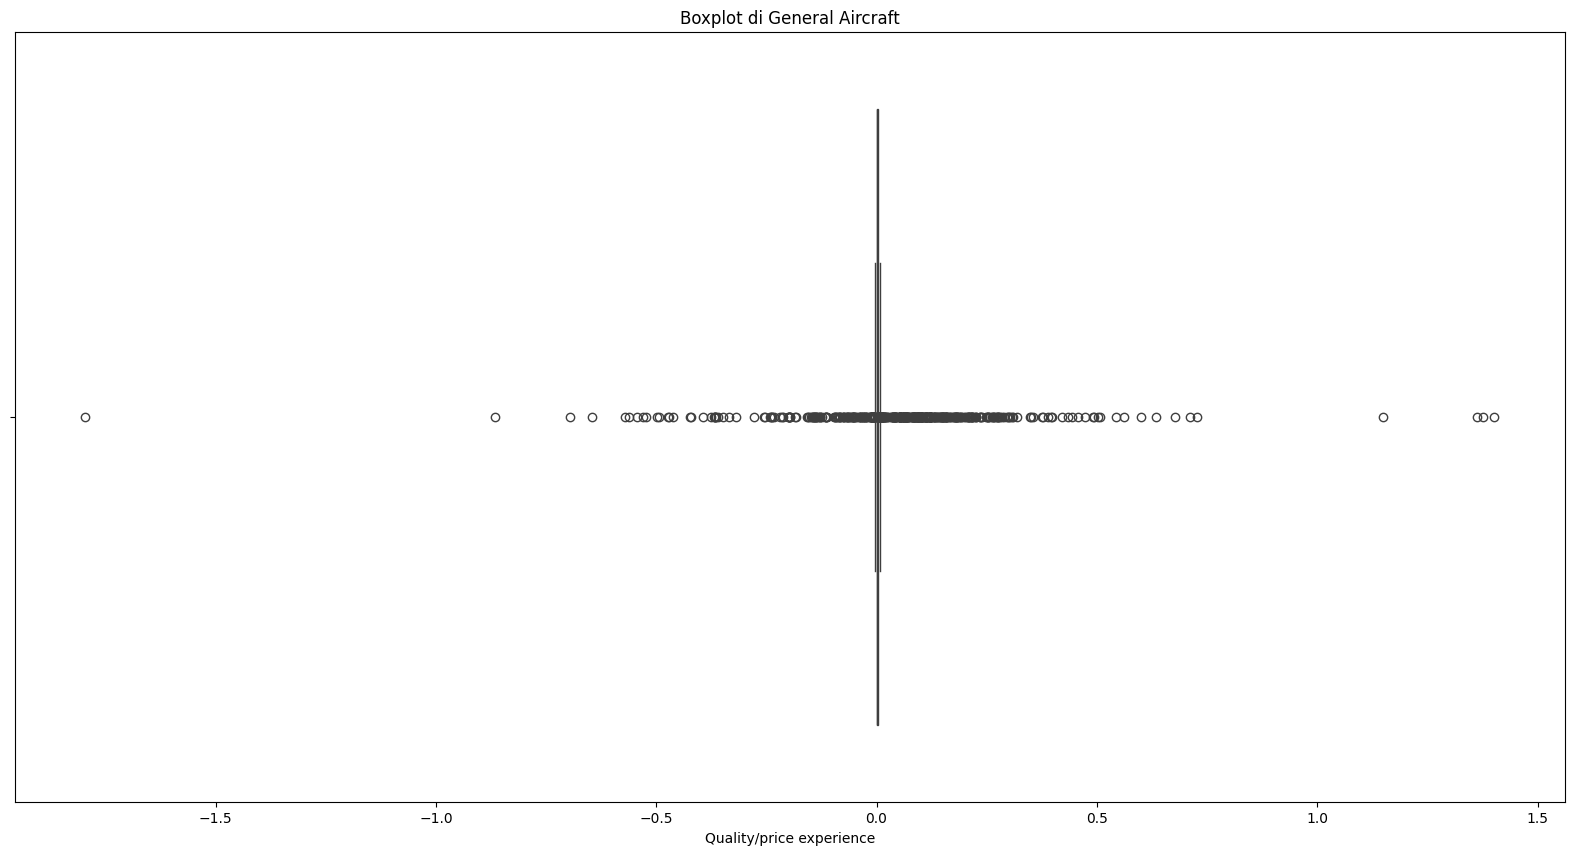

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
descrittive = df['Quality/price experience'].describe()
print(descrittive)
plt.figure(figsize=(20, 10))
sns.histplot(df['Quality/price experience'], kde=True)
plt.title('Distribuzione di General Aircraft')
plt.xlabel('Quality/price experience')
plt.ylabel('Frequenza')
plt.show()
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['Quality/price experience'])
plt.title('Boxplot di General Aircraft')
plt.show()


In [30]:
num_superiore_03 = (df['Quality/price experience'] > 0.1).sum()
num_inferiore_03 = (df['Quality/price experience'] < -0.1).sum()

print(f"Numero di punti con flight delay superiore a 0.3: {num_superiore_03}")
print(f"Numero di punti con flight delay inferiore a 0.3: {num_inferiore_03}")

Numero di punti con flight delay superiore a 0.3: 165
Numero di punti con flight delay inferiore a 0.3: 71


## Discretization of the topic

In [5]:
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations

# List of attributes to discretize
attributes = [
    'staff at gate', 'Airport price', 'Customer service',
    'luggage hand for priority', 'Quality/price experience',
    'Time on flight', 'Seat and legroom for family and child',
    'week destination advise'
]

# Discretization function
def discretize(value, feature_name):
    """
    Discretizes the value into categorical bins based on the feature name.
    """
    if value > 0.1:
        return f'good_{feature_name}'
    elif value < -0.1:
        return f'not_good_{feature_name}'
    else:
        return 'not interesting'

# Apply the discretization function to each attribute
for attribute in attributes:
    df[attribute] = df[attribute].apply(discretize, feature_name=attribute)

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Collect results for Chi-squared test
results = []

# Iterate over all pairs of categorical variables
for var1, var2 in combinations(categorical_columns, 2):
    # Create a contingency table
    contingency_table = pd.crosstab(df[var1], df[var2])
    
    # Perform Chi-squared test
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    # Store the results
    results.append({
        'Variable 1': var1,
        'Variable 2': var2,
        'Chi2 Value': chi2,
        'P-Value': p,
        'Degrees of Freedom': dof
    })

# Create a DataFrame of the results
results_df = pd.DataFrame(results)

# Display the results
print("Chi-squared test results for all pairs of variables:")
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('chi2_results.csv', index=False)

# Display the first few rows of the DataFrame to verify discretization
print("\nSample of the discretized DataFrame:")
print(df.head())


Chi-squared test results for all pairs of variables:
                                Variable 1               Variable 2  \
0                           Date Published        Passenger Country   
1                           Date Published        Type Of Traveller   
2                           Date Published                Seat Type   
3                           Date Published                   Origin   
4                           Date Published              Destination   
..                                     ...                      ...   
131                         Time on flight  week destination advise   
132                         Time on flight                   Source   
133  Seat and legroom for family and child  week destination advise   
134  Seat and legroom for family and child                   Source   
135                week destination advise                   Source   

        Chi2 Value        P-Value  Degrees of Freedom  
0    110931.102311  3.642898e-103     

        Unnamed: 0  Cabin Staff Service  Inflight Entertainment  \
count  2249.000000          2128.000000              331.000000   
mean   1124.000000             2.747180                1.157100   
min       0.000000             0.000000                1.000000   
25%     562.000000             1.000000                1.000000   
50%    1124.000000             3.000000                1.000000   
75%    1686.000000             4.000000                1.000000   
max    2248.000000             5.000000                5.000000   
std     649.374699             1.535351                0.566303   

       Wifi & Connectivity  staff at gate  Airport price  Customer service  \
count           268.000000    2249.000000    2249.000000       2249.000000   
mean              1.123134       0.015341       0.004128          0.011754   
min               1.000000      -1.592568      -0.951085         -1.485860   
25%               1.000000       0.000000       0.000000          0.000000   
50%   

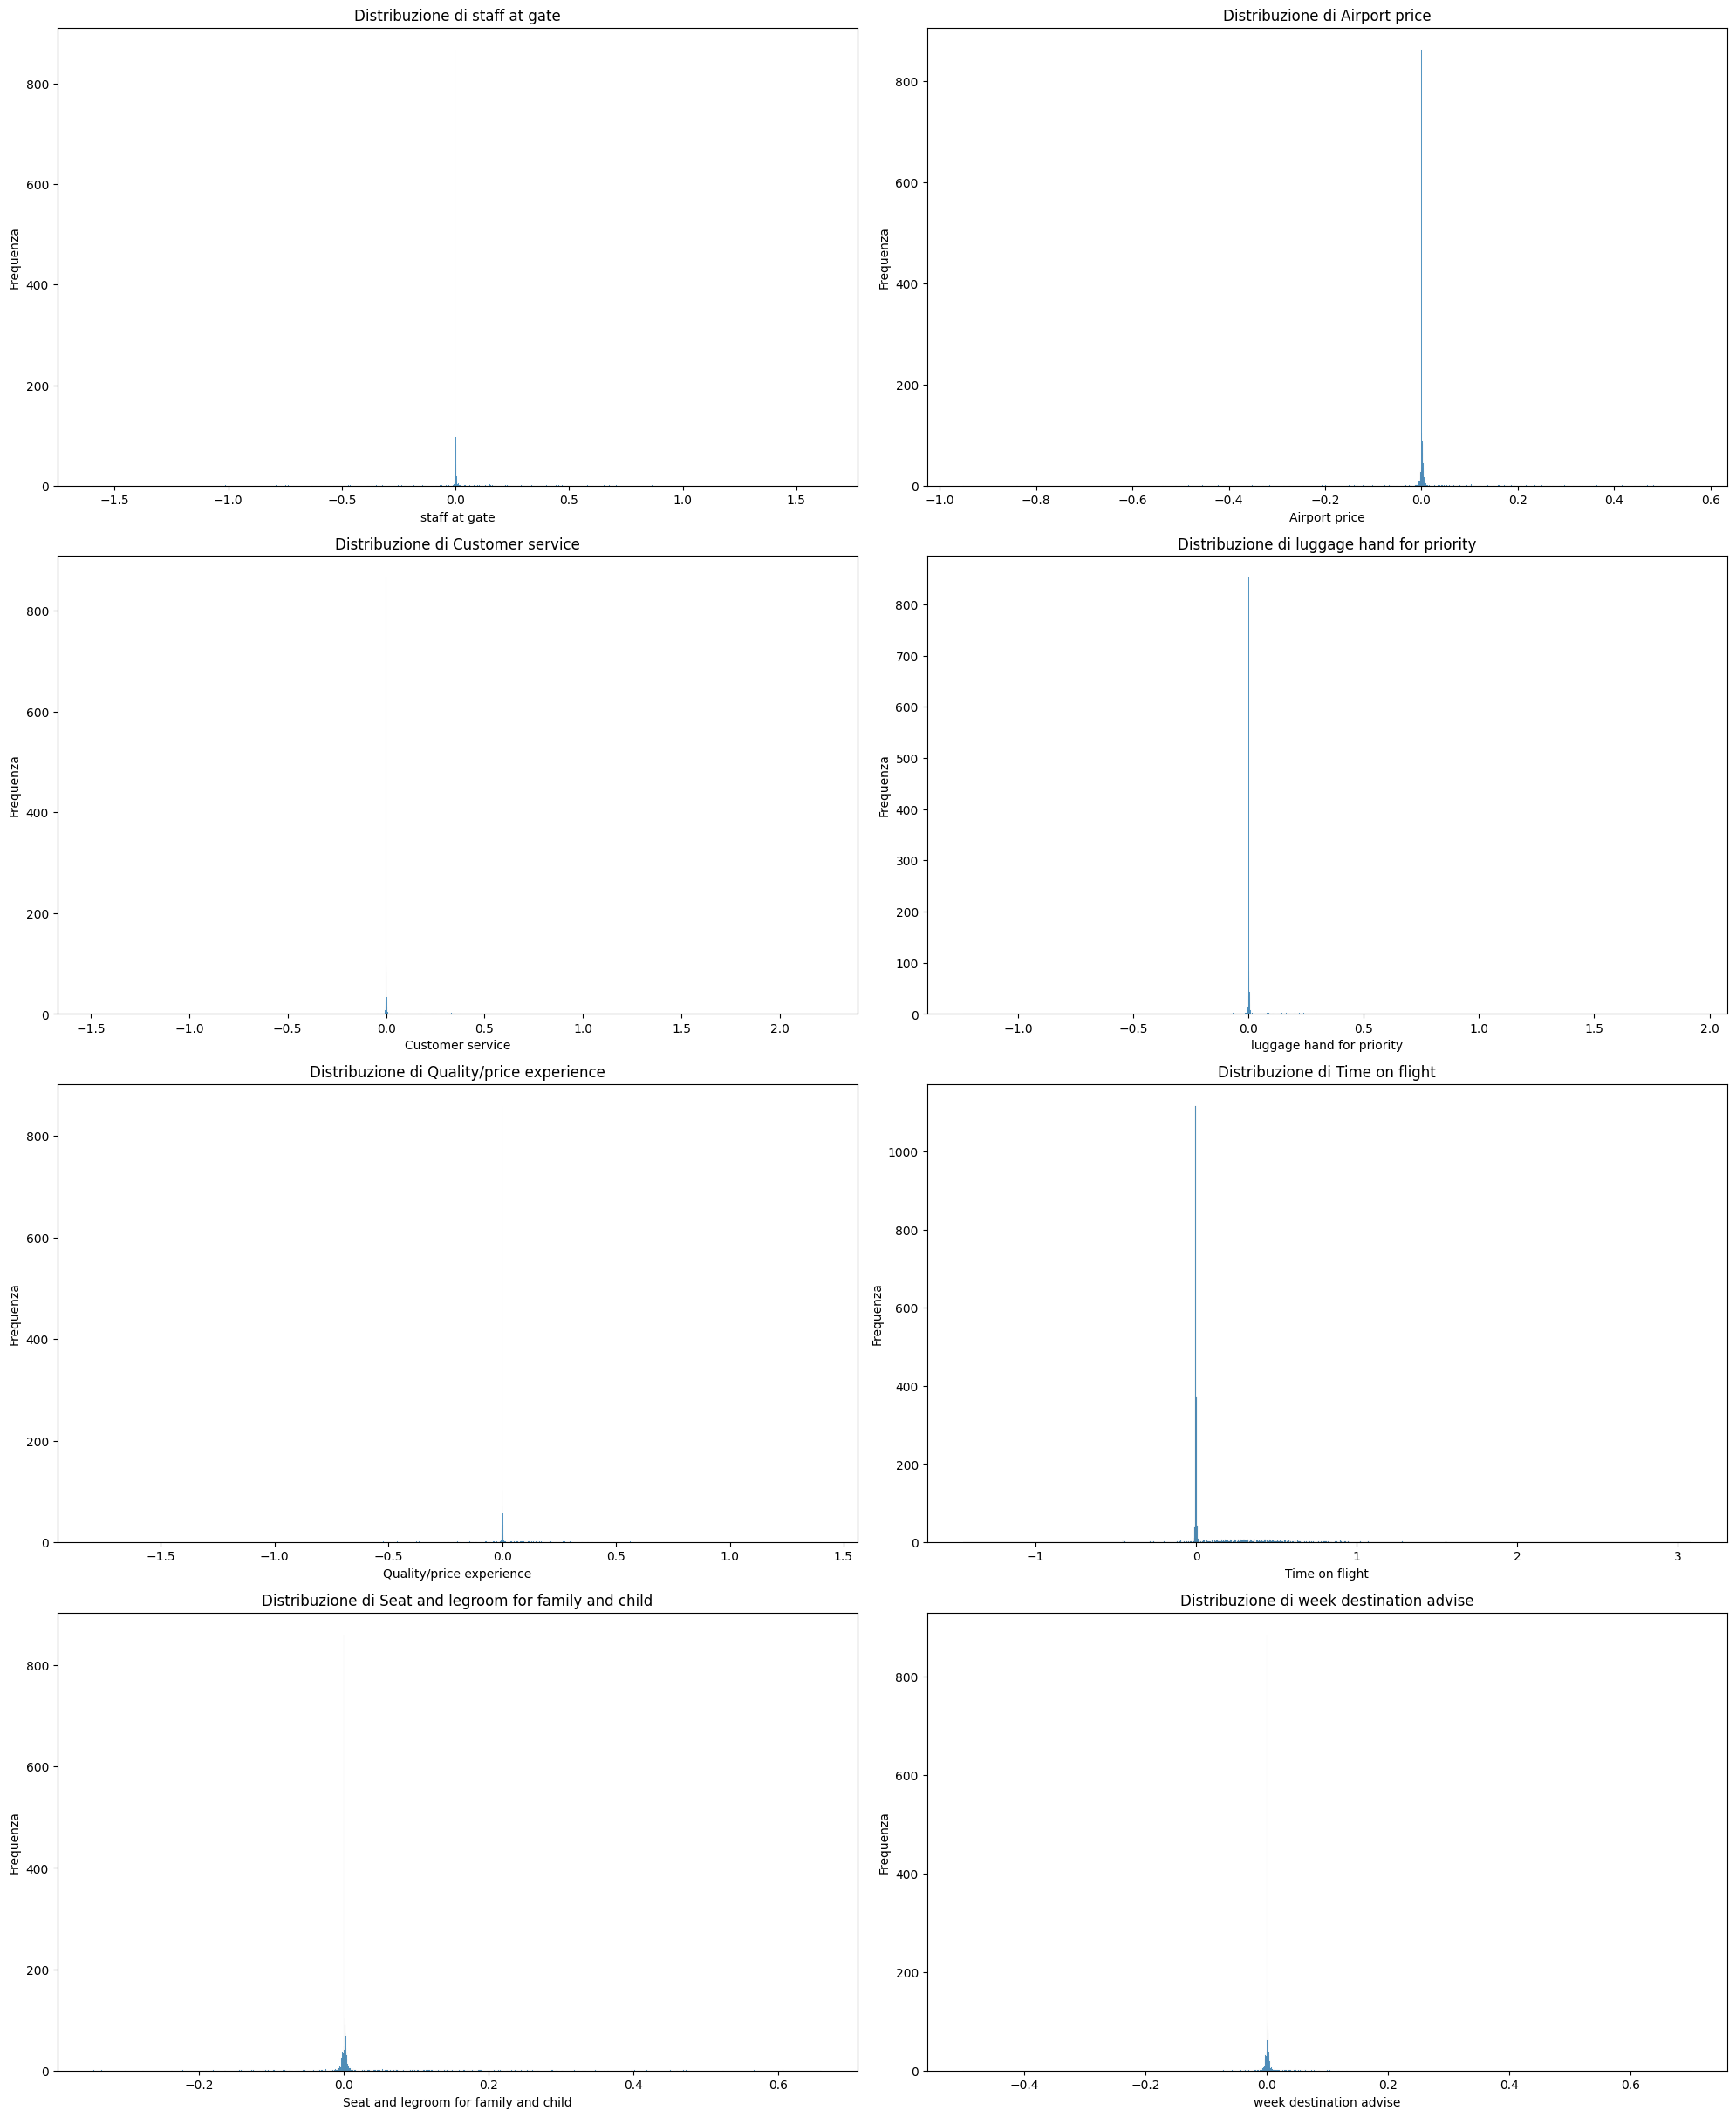

In [34]:
print(df.describe())
# Visualizzare la distribuzione con istogrammi
plt.figure(figsize=(20, 30))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[attribute], kde=False)
    plt.title(f'Distribuzione di {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequenza')

plt.tight_layout()
plt.show()

## Simple example of topic application for Seasonality of some topics

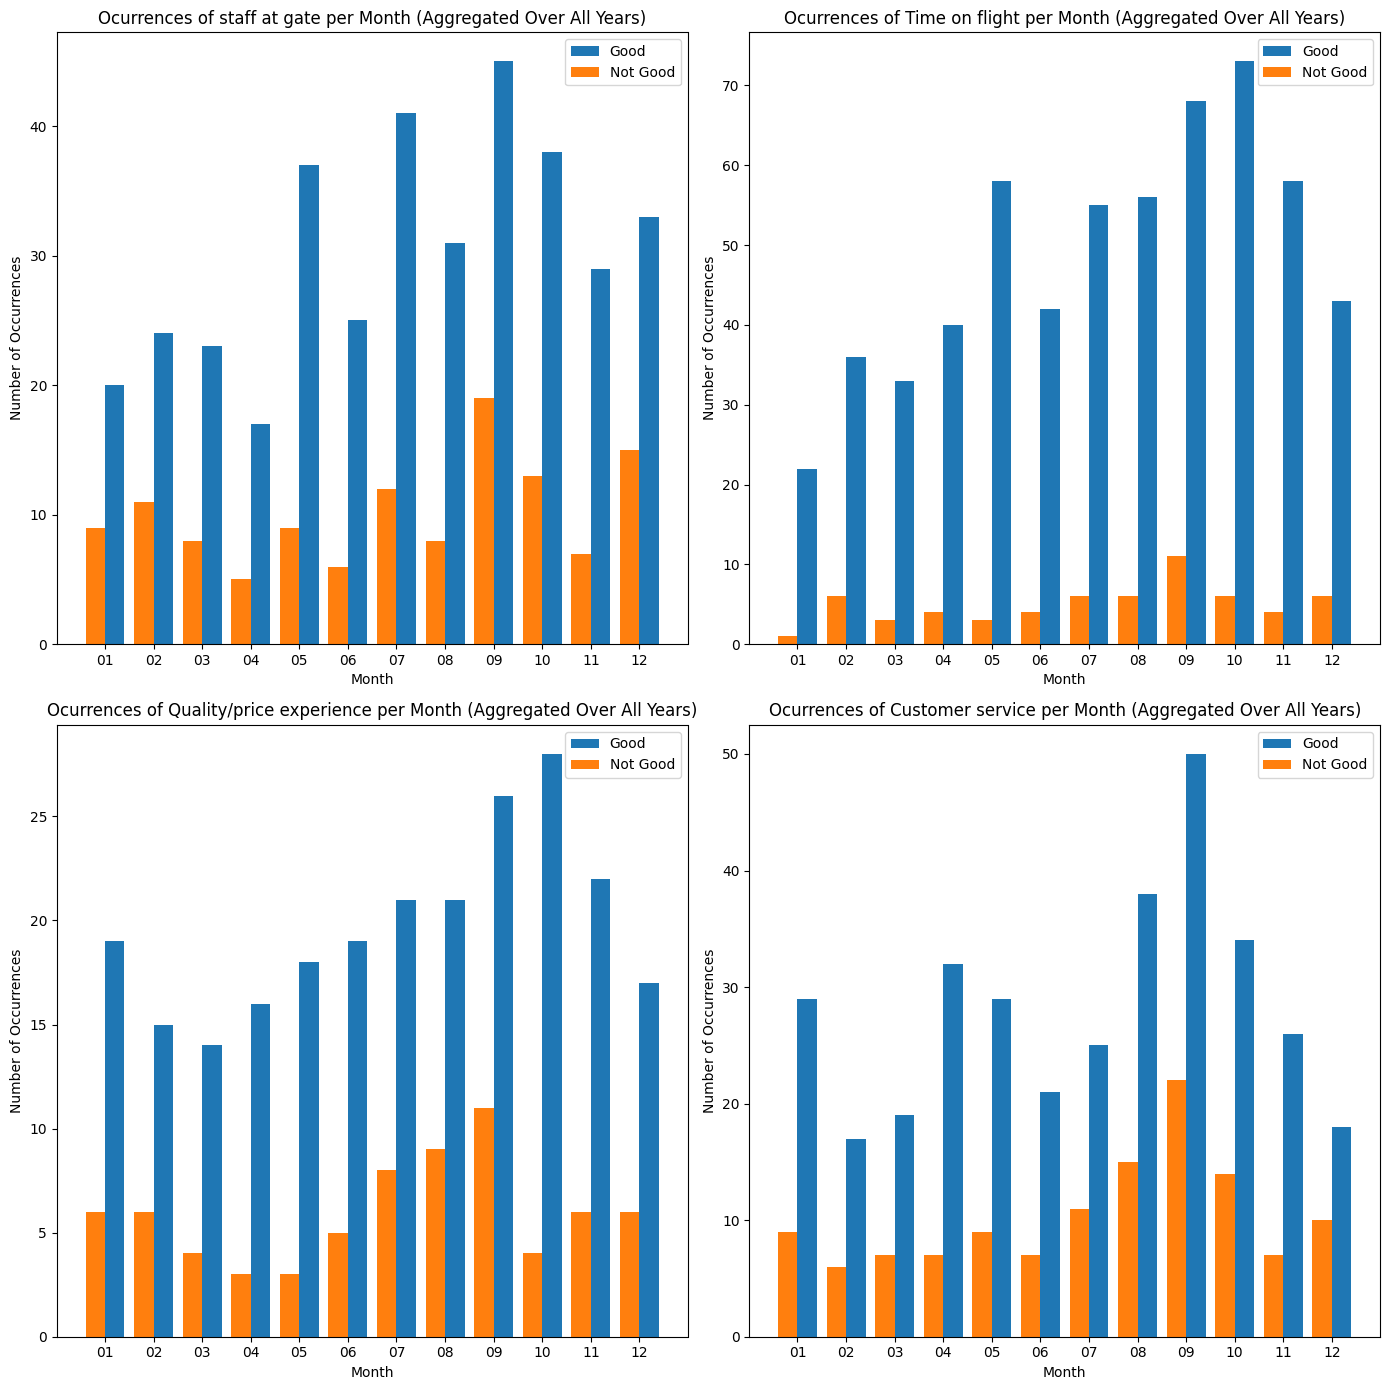

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponiamo di avere un DataFrame chiamato df con le colonne: 'Date Published', 'Queue Time', 'Flight Delay', 'Quality/Price Flight', 'Customer Service'

# Converti 'Date Published' in un formato datetime
df['Date'] = pd.to_datetime(df['Date Published'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Definizione delle colonne da analizzare
columns_to_analyze = ['staff at gate', 'Time on flight', 'Quality/price experience', 'Customer service']
labels = ['Good', 'Not Good']

# Funzione per aggregare e plottare i dati
def plot_metric(ax, df, metric):
    # Filtra le recensioni per ogni tipo di metrica
    df_good = df[df[metric].str.contains('good_', case=False, na=False)]
    df_not_good = df[df[metric].str.contains('not_good_', case=False, na=False)]

    # Conta le occorrenze per mese aggregando su tutti gli anni
    count_good = df_good.groupby(['Month']).size().reset_index(name='Count')
    count_not_good = df_not_good.groupby(['Month']).size().reset_index(name='Count')

    # Aggiungi un'etichetta per il tipo di recensione
    count_good['Metric Type'] = 'Good'
    count_not_good['Metric Type'] = 'Not Good'

    # Unisci i DataFrame
    counts = pd.concat([count_good, count_not_good])

    # Prepara i dati per il grafico
    months = [f"{i:02d}" for i in range(1, 13)]
    x = range(len(months))

    # Plot delle occorrenze 'Good' e 'Not Good'
    for label in labels:
        subset = counts[counts['Metric Type'] == label]
        month_counts = subset.groupby('Month')['Count'].sum().reindex(range(1, 13), fill_value=0)
        ax.bar(
            [i + (0.2 if label == 'Good' else -0.2) for i in x],
            month_counts,
            width=0.4,
            label=label
        )

    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Occurrences')
    ax.set_title(f'Ocurrences of {metric} per Month (Aggregated Over All Years)')
    ax.set_xticks(x)
    ax.set_xticklabels(months)
    ax.legend()

# Imposta il layout della figura con 2x2 sottotrame
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

# Flatten gli assi per l'iterazione
axs = axs.flatten()

# Crea un grafico per ogni colonna specificata
for i, column in enumerate(columns_to_analyze):
    plot_metric(axs[i], df, column)

# Migliora il layout
plt.tight_layout()

# Salva il grafico
plt.savefig('metrics_per_month.png', dpi=300)

# Mostra il grafico
plt.show()


In [18]:
import pandas as pd

# Assume the DataFrame is named df
# Create a mapping function to transform 'good_' and 'not_good_' into attribute names
def transform_review(column_name, review):
    """
    Transform the review strings by adding 'good_' or 'not_good_' prefixes based on the value.
    
    Args:
        column_name (str): The name of the column being processed.
        review (str): The review text.
        
    Returns:
        str: The transformed review text.
    """
    if 'good_' in review:
        return f'good_{column_name}'
    elif 'not_good_' in review:
        return f'not_good_{column_name}'
    return review

# List of columns to transform
columns_to_transform = [
    'staff at gate', 'Airport price', 'Customer service',
    'luggage hand for priority', 'Quality/price experience',
    'Time on flight', 'Seat and legroom for family and child',
    'week destination advise'
]

# Apply the transformation to all specified columns
for col in columns_to_transform:
    df[col] = df[col].apply(lambda x: transform_review(col, x))

# Convert 'Date Flown' column to datetime format
df['Date Flown'] = pd.to_datetime(df['Date Flown'])

# Extract the month as the full name of the month
df['Month'] = df['Date Flown'].dt.strftime('%B')

# Display the first few rows to verify the changes
print(df.head())


   Unnamed: 0 Date Published Passenger Country Type Of Traveller  \
0           0     2024-02-03    United Kingdom    Family Leisure   
1           1     2024-01-26    United Kingdom    Couple Leisure   
2           2     2024-01-20    United Kingdom    Couple Leisure   
3           3     2024-01-07    United Kingdom      Solo Leisure   
4           4     2024-01-06            Israel      Solo Leisure   

       Seat Type     Origin     Destination Date Flown  Cabin Staff Service  \
0  Economy Class       Faro           Luton 2024-02-01                  5.0   
1  Economy Class    Belfast        Alicante 2024-01-01                  5.0   
2  Economy Class  Edinburgh  Paris Beauvais 2023-10-01                  5.0   
3  Economy Class       Faro       Liverpool 2024-01-01                  2.0   
4  Economy Class     Dublin      Manchester 2024-01-01                  5.0   

  Recommended  ...       Customer service       luggage hand for priority  \
0         yes  ...        not interesti

# Example of application: pattern mining analysis

Processing 1330 combinations | Sampling itemset size 53
Top 10 Rules by Lift:
                                            antecedents  \
4140  (Economy Class, Couple Leisure, good_Time on f...   
4149                                          (October)   
4147              (Couple Leisure, good_Time on flight)   
4142                           (Economy Class, October)   
1297              (Couple Leisure, good_Time on flight)   
1300                                          (October)   
2532    (Economy Class, good_luggage hand for priority)   
2533       (good_Seat and legroom for family and child)   
614        (good_Seat and legroom for family and child)   
2530  (good_Seat and legroom for family and child, E...   

                                            consequents   support  confidence  \
4140                                          (October)  0.010227    0.175573   
4149  (Economy Class, Couple Leisure, good_Time on f...  0.010227    0.132948   
4147                         

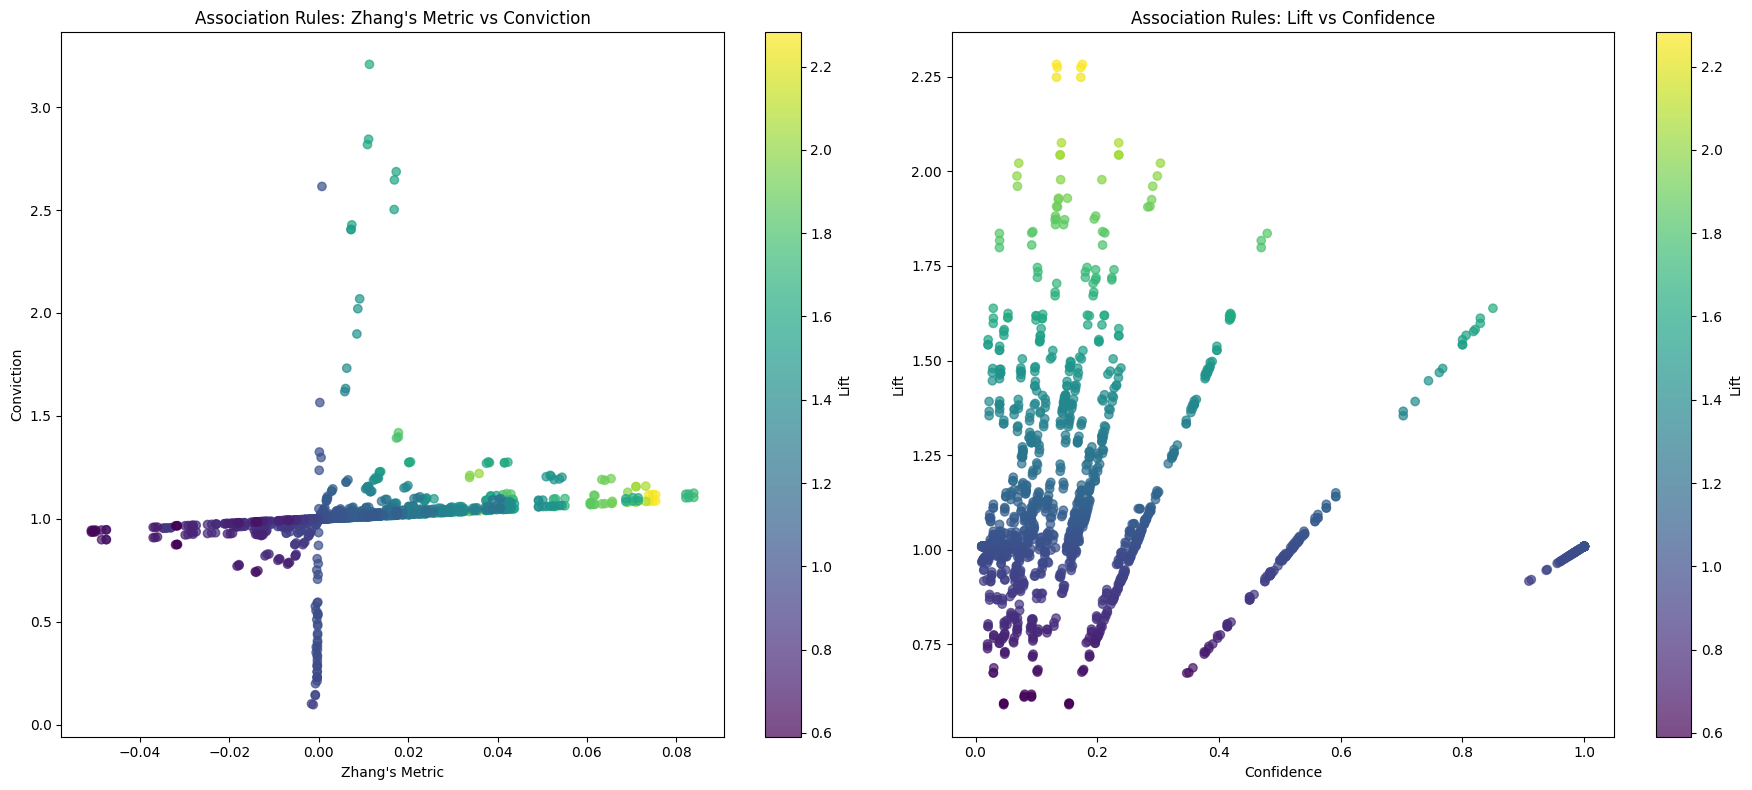

In [19]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Convert the DataFrame into a transactional format with 'good_' and 'not_good_' prefixes
def prepare_transaction_data(df, columns):
    """
    Convert the DataFrame into a list of transactions with appropriate prefixes.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        columns (list): List of columns to include in the transactions.
        
    Returns:
        transactions (list of lists): The transactional data.
    """
    transactions = []
    for index, row in df.iterrows():
        transaction = []
        for col in columns:
            if pd.notna(row[col]):
                # Add prefix based on the value
                if 'good' in str(row[col]).lower():
                    transaction.append(f'good_{col}')
                elif 'not good' in str(row[col]).lower():
                    transaction.append(f'not_good_{col}')
                else:
                    transaction.append(row[col])
        transactions.append(transaction)
    return transactions

# List of columns to include in the transactions
columns_to_transform = [
    'staff at gate', 'Airport price', 'Customer service',
    'luggage hand for priority', 'Quality/price experience',
    'Time on flight', 'Seat and legroom for family and child',
    'week destination advise'
]

# Columns to include in the transactional data
columns_to_include = ['Type Of Traveller', 'Origin', 'Destination', 'Passenger Country', 'Seat Type', 'Month'] + columns_to_transform

# Prepare the transactional data
transactions = prepare_transaction_data(df, columns_to_include)

# Encode the transactions into one-hot format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets with a very low support
frequent_itemsets = apriori(df_transactions, min_support=0.01, use_colnames=True, verbose=True)

# Calculate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Filter rules containing 'good_' or 'not_good_' in any of the items
def filter_rules(rules, columns_to_transform):
    """
    Filter the rules to include only those containing 'good_' or 'not_good_' prefixes.
    
    Args:
        rules (pd.DataFrame): The DataFrame containing association rules.
        columns_to_transform (list): List of columns to consider for filtering.
        
    Returns:
        filtered_rules (pd.DataFrame): The filtered DataFrame with relevant rules.
    """
    def contains_good_or_not_good(itemset):
        return any(item.startswith('good_') or item.startswith('not_good_') for item in itemset)

    filtered_rules = rules[
        rules['antecedents'].apply(contains_good_or_not_good) |
        rules['consequents'].apply(contains_good_or_not_good)
    ]
    return filtered_rules

# Filter the rules
filtered_rules = filter_rules(rules, columns_to_transform)

# Further filter out rules containing 'not interesting'
filtered_rules = filtered_rules[~filtered_rules['antecedents'].apply(lambda x: any('not interesting' in item for item in x)) & 
                                ~filtered_rules['consequents'].apply(lambda x: any('not interesting' in item for item in x))]

# Calculate additional metrics such as conviction and Zhang's metric
filtered_rules = filtered_rules.copy()
filtered_rules['conviction'] = (1 - filtered_rules['consequent support']) / (1 - filtered_rules['confidence'])
filtered_rules['zhangs_metric'] = (filtered_rules['support'] - (filtered_rules['antecedent support'] * filtered_rules['consequent support'])) / filtered_rules[['support', 'antecedent support', 'consequent support']].max(axis=1)

# Sort the rules by lift
filtered_rules = filtered_rules.sort_values(by='lift', ascending=False)

# Print the top 10 rules by lift
top_10_lift = filtered_rules.head(10)
print("Top 10 Rules by Lift:")
print(top_10_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction', 'zhangs_metric']])

# Plot the results
plt.figure(figsize=(18, 8))

# Plot 1: Zhang's Metric vs Conviction
plt.subplot(1, 2, 1)
sc = plt.scatter(filtered_rules['zhangs_metric'], filtered_rules['conviction'], c=filtered_rules['lift'], cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Lift')
plt.xlabel('Zhang\'s Metric')
plt.ylabel('Conviction')
plt.title('Association Rules: Zhang\'s Metric vs Conviction')

# Plot 2: Lift vs Confidence
plt.subplot(1, 2, 2)
sc = plt.scatter(filtered_rules['confidence'], filtered_rules['lift'], c=filtered_rules['lift'], cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Lift')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Association Rules: Lift vs Confidence')

# Show and save the plots
plt.tight_layout()
plt.savefig('association_rules_analysis.png', dpi=300)
plt.show()


In [17]:

# Trova le regole con confidenza > 0.8 e lift > 1.5
rules_high_conf_lift = filtered_rules[(filtered_rules['confidence'] > 0.7) & (filtered_rules['lift'] > 1.5)]

# Stampa le regole filtrate
print("Regole con Confidenza > 0.8 e Lift > 1.6:")
print(rules_high_conf_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction', 'zhangs_metric']])


Regole con Confidenza > 0.8 e Lift > 1.6:
                                           antecedents  \
6188  (Stansted, Economy Class, good_Customer service)   
6193                 (Stansted, good_Customer service)   
3154                 (Stansted, good_Customer service)   

                          consequents   support  confidence      lift  \
6188                 (United Kingdom)  0.015118    0.850000  1.638089   
6193  (Economy Class, United Kingdom)  0.015118    0.829268  1.611948   
3154                 (United Kingdom)  0.015118    0.829268  1.598136   

      conviction  zhangs_metric  
6188    3.207351       0.011349  
6193    2.843931       0.011156  
3154    2.817887       0.010904  
